# The multilayer perceptron

This lecture will give an overview of the simples **deep learning** (DL) model, the **multilayer perceptron** (MLP).

We will try to answer: What is an MLP and how to train it?

## What is the multilayer preceptron?

### Linear regression

We begin, by reviewing the (affine) **linear regression**. Linear regression is a model

$$f_\Theta: \mathbb{R}^n \ni x \to y \in \mathbb{R}^m$$

given by

$$y = Ax + b,$$

where $A\in\mathbb{R}^{m\times n}$ and $b\in\mathbb{R}^m$ comprise the parameters $\Theta = (A, b)$.

Given a dataset $\mathscr{D} =\{(x_i,y_i)\}_{i=1}^N$ of realizations $(x_i, y_i)\sim p_{X,Y}$ one can train the linear regression via minimising the mean squared error (MSE), i.e., by solving

$$\Theta^* = \arg\min_{\Theta} \frac{1}{N} \sum_i \|f_\Theta(x_i) - y_i\|_2^2.$$

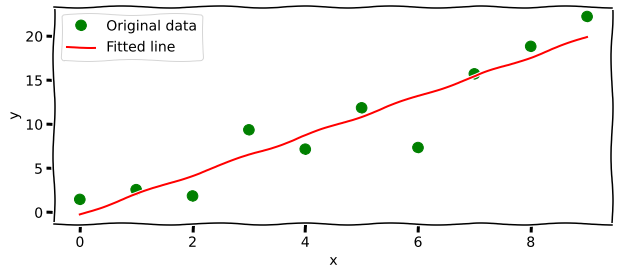

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
plt.xkcd()

X = np.arange(10).reshape(-1, 1)
y = 2 * X.flatten()
η = np.random.randn(10) * 4
yδ = y + η

reg = LinearRegression().fit(X, yδ)
y_hat = reg.predict(X)

plt.plot(X, yδ, 'go', label='Original data', markersize=10)
plt.plot(X, y_hat, 'r', label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.gcf().set_size_inches(10, 4)
plt.show()

Unsurprisingly linear regression is a tool for solving regression problems. If we want to solve classification problems, we can use a modification of linear regression, **logistic regression**.

### Logistic regression

We can define logistic regression via linear regression as

$$g_\Theta: \mathbb{R}^n \ni x \mapsto (s \circ f_\Theta)(x) \in \mathbb{R}^m,$$

where $s: \mathbb{R} \to \mathbb{R}$ is the pointwise applied logistic function (often called sigmoid) defined as

$$s(x) = \frac{1}{1+\exp -x}.$$

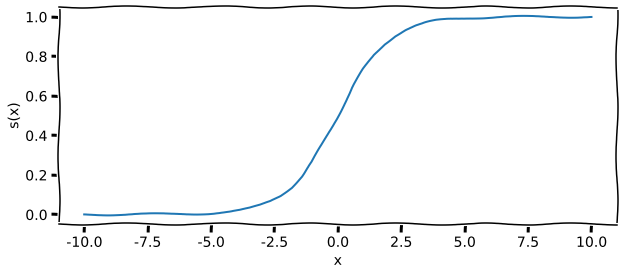

In [2]:
s = lambda x: 1 / (1 + np.exp(-x))
xs = np.linspace(-10, 10)
plt.xlabel("x")
plt.ylabel("s(x)")
plt.plot(xs, s(xs))
plt.gcf().set_size_inches(10, 4)
plt.show()

In principle, one could also train logistic regression via the MSE. For reasons based on [Bernoulli variables](https://en.wikipedia.org/wiki/Bernoulli_distribution?oldformat=true) though, it is better to train the model via the binary cross-entropy (BCE). The BCE is defined as follows:

$$\mbox{BCE}(\hat y, y) = -y \log \hat y - (1-y) \log(1 - \hat y)$$

I.e., we train via

$$\Theta^* = \arg\min_{\Theta} \frac{1}{N} \sum_i \mbox{BCE}(f_\Theta(x_i), y_i).$$

### The multilayer preceptron; or, what is deep learning?

We call DL "deep" simply because it discusses deep models, in the sense that one concatenates mutiple simple/shallow models. The first deep learning model was the MLP. The classical MLP is simply a concatenation of logistic regression models. I.e.,

$$\phi_\Theta = h \circ g_{\Theta_{L-1}} \circ \cdots \circ g_{\Theta_1},$$

with $\Theta = \{\Theta_i\}_i$ and $h$ either also a logistic regression model or a linear regression, depending on whether one wants to use the MLP for classification or regression. We can also train these models with the MSE or BCE loss discussed above.

While we defined the MLP using the sigmoid function as the so-called **activation function**, nowadays MLPs are defined more general as

$$\phi_\Theta = \phi^{(L)} \circ \cdots \circ \phi^{(1)},$$

with the $\phi_i$ being the so-called layers of the network defined as

$$\phi^{(i)}(x) = f_i(A_i x + b_i)$$

with $f_i$ being some kind of non-linear function -- the so-called activation function --  e.g., sigmoid, and the trainable parameters $A_i\in\mathbb{R}^{n_{i-1} \times n_i}$ and $b_i\in\mathbb{R}^{n_i}$. Here we have $n_0 = n$ the dimension of $x\in\mathbb{R}^n$ and $n_L=m$ the dimension of $y \in \mathbb{R}^m$:

For different reasons, e.g., the [vanishing gradients problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem?oldformat=true), today, sigmoid functions are practically only used in the last layer. Two "standard choices" for activation functions are

$$\mbox{ReLU} (x) = \max(0, x)$$

and the hyperbolic tangent.

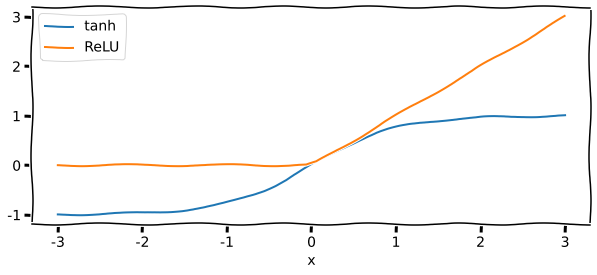

In [3]:
s = lambda x: 1 / (1 + np.exp(-x))
t = lambda x: np.tanh(x)
r = lambda x: np.clip(x, 0, np.inf)

xs = np.linspace(-3, 3)
plt.xlabel("x")
plt.plot(xs, t(xs), label="tanh")
plt.plot(xs, r(xs), label="ReLU")
plt.gcf().set_size_inches(10, 4)
plt.legend()
plt.show()

## The training of deep models

### The problem
While we now know what an MLP is, we have not discussed how to choose its weights $\Theta$, i.e., how to train its weights $A_i$ and biases $b_i$.

for a given loss function
$\mathscr{l}:Y\times Y \to \mathbb{R},$
e.g., with and $Y=\mathbb{R}^n$ we can define the general so-called **loss or empirical risk** as

$$L(\Theta) = \frac{1}{|\mathscr{D}|}\sum_{(x,y)\in\mathscr{D}} \mathscr{l}(\phi_\Theta(x), y).$$

This is simply the generalization of what we discuss before where we made the common choices of $\mathscr{l} = \mbox{MSE}$ and $\mathscr{l}= \mbox{BCE}$.

The goal of training the model is to find a $\Theta$ that minimizes the true risk defined as

$$L^*(\Theta) = \mathbb{E}_{(x,y)\sim p_{X,Y}} \mathscr{l}(\phi_\Theta(x), y).$$

Unfortunately, we do not have access to the whole distribution, only the samples in $\mathscr{D}$; therefore, as a surrogate, we try to find a $\Theta$ that leads to small values of $L(\Theta)$ and makes us hopeful, that also $L^*(\Theta)$ is small.

To do that, we can not simply minimize $L(\Theta)$ as much as possible. If the MLP/neural network is *large enough*, it could simply overfit, i.e., memorize all data points of $\mathscr{D}$ in its parameters $\Theta$. This would minimize $L$, but we have no idea whether it also leads to small values of $L^*$.

### A solution: Stochastic gradient descent with a validation set
The most common solution to this problem starts by splitting the dataset into a disjoint training, validation, and test set. We will denote this partitioning via

$$\mathscr{D} = \mathscr{D}_\text{train} \cup \mathscr{D}_\text{valid} \cup \mathscr{D}_\text{test}.$$

```{note}
The split of the sets should almost always be random.
```

One then minimizes the empirical loss based on the empirical risk on over the training dataset, i.e.,

$$L(\Theta, \mathscr{D}_\text{train}) = \frac{1}{|\mathscr{D}_\text{train}|}\sum_{(x,y)\in\mathscr{D}_\text{train}} \mathscr{l}(\phi_\Theta(x), y),$$

via stochastic gradient descent.

The idea of stochastic gradient descent (SGD) is the following:

1. Sample $k$ random samples from $\mathscr{D}_\text{train}$. These samples comprise a **batch** $B\subset \mathscr{D}_\text{train}$ of size $k$.
2. Compute the gradient $\nabla_\Theta L(\Theta, B)$.
3. Take a [gradient step](https://en.wikipedia.org/wiki/Gradient_descent?oldformat=true) for some predefined step size (also called learning rate) $\eta$, i.e., update/reassign $\Theta \leftarrow \Theta - \eta \nabla_\Theta L(\Theta, B).$
4. Usually go to 1., but *from time to time*, e.g., after every 100 repetitions, go to 5.
5. Compute $L(\Theta, \mathscr{D}_\text{valid})$. If you have previously computed this for earlier parameters, compare the value. If the value has not decreased, stop the training. Otherwise, go to 1.

If after the training $L(\Theta, \mathscr{D}_\text{train})$ and $L(\Theta, \mathscr{D}_\text{valid})$ are small, we can have some confidence, that our model generalizes, i.e., achives small values for the true risk. To estimate the value of the true risk we can now compute $L(\Theta, \mathscr{D}_\text{test})$.

### A regression Example

We will train a simple neural network to fit the function

$$f: [-\pi, \pi] \ni x \mapsto \cos(x).$$

We begin by creating a noisy training dataset with 300 samples and split it into training, validation, and test set.

#### Define dataset

In [4]:
import torch
from tqdm.notebook import tqdm

xs = (2 * torch.rand(256, 1) - 1) * np.pi
ys = torch.cos(xs)

xs_train, ys_train = xs[:128], ys[:128]
xs_valid, ys_valid = xs[128:], ys[128:]

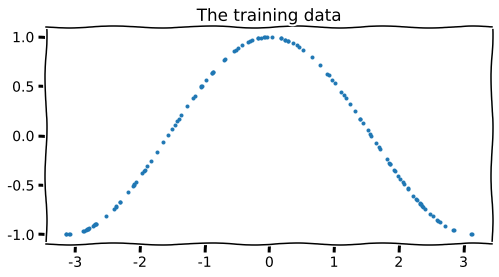

In [5]:
plt.title("The training data")
plt.scatter(xs_train.flatten(), ys_train.flatten(), marker='.')
plt.gcf().set_size_inches(8, 4)
plt.show()

#### Define simple MLP

We then define a simple two layer MLP.

In [6]:
class SimpleMLP(torch.nn.Module):
    def __init__(self, in_features, final_act):
        super().__init__()
        self.final_act = final_act

        self.layer1 = torch.nn.Linear(in_features=in_features, out_features=64)
        self.layer2 = torch.nn.Linear(in_features=64, out_features=1)


    def forward(self, xs):
        zs = torch.relu(self.layer1(xs))
        ys = self.final_act(self.layer2(zs))
        return ys

#### Instantiate objects for training

We use the MSE as our loss and create an instance of the model class and create a SGD optimizer with a step size of $10^{-2}$.

In [7]:
criterion = torch.nn.MSELoss()
model = SimpleMLP(in_features=1, final_act=torch.nn.Identity())
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

#### Run training

We then start the train with a batch size of $8$ and $5000$ training steps.

In [8]:
def get_train_batch(batch_size=8):
    idxs = torch.randperm(len(xs_train))[:batch_size]

    xs_batch = xs_train[idxs]
    ys_batch = ys_train[idxs]

    return xs_batch, ys_batch

In [9]:
interval_eval = 100
losses_train = []
losses_valid = []

for i in range(5000):
    xs_batch, ys_batch = get_train_batch()

    ys_hat = model(xs_batch)
    loss = criterion(ys_hat, ys_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % interval_eval == 0:
        model.eval()
        loss_train = criterion(model(xs_train), ys_train)
        loss_valid = criterion(model(xs_valid), ys_valid)
        losses_train.append(loss_train.item())
        losses_valid.append(loss_valid.item())
        model.train()

#### Plot training losses

Plot the training and validation loss over the course of the training.

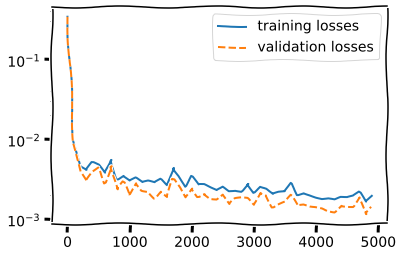

In [10]:
plt.plot(range(0, interval_eval * len(losses_train), interval_eval), losses_train, "-", label="training losses")
plt.plot(range(0, interval_eval * len(losses_valid), interval_eval), losses_valid, "--", label="validation losses")
plt.legend()
plt.yscale("log")
plt.show()

#### Evaluate the model

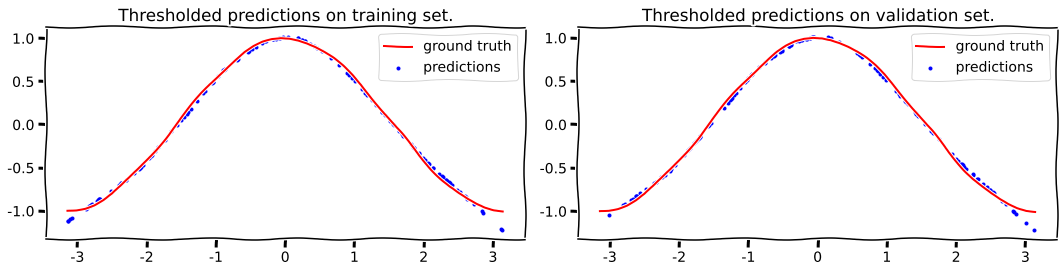

In [11]:
model.eval()

ts = np.linspace(-np.pi, np.pi)
gt = np.cos(ts)

plt.subplot(1, 2, 1)
plt.title("Thresholded predictions on training set.")
ys_hat = model(xs_train).detach()
plt.scatter(xs_train, ys_hat, marker='.', c='b', label="predictions")
plt.plot(ts, gt, c='r', label="ground truth")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Thresholded predictions on validation set.")
ys_hat = model(xs_valid).detach()
plt.scatter(xs_valid, ys_hat, marker='.', c='b', label="predictions")
plt.plot(ts, gt, c='r', label="ground truth")
plt.legend()

plt.gcf().set_size_inches(15, 4)
plt.tight_layout()
plt.show()

### A classification Example

We proceed analogous to the regression task above. The task is to classfiy whether a point $x\in[0,1]^2$ lies left or right of the line $x_1=0.5$. Again, we begin by creating the dataset.

#### Define simple MLP

In [12]:
xs = torch.rand(256, 2)
ys = xs[:,:1].round()

xs_train, ys_train = xs[:128], ys[:128]
xs_valid, ys_valid = xs[128:], ys[128:]

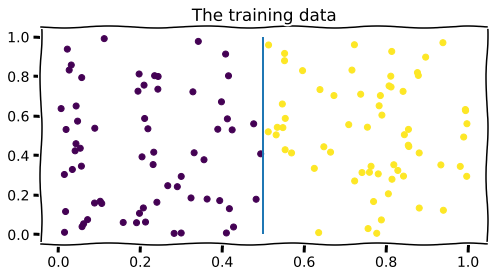

In [13]:
plt.title("The training data")
plt.scatter(xs_train[:,0], xs_train[:,1], c=ys_train)
plt.vlines(.5, 0, 1)
plt.gcf().set_size_inches(8, 4)
plt.show()

#### Instantiate objects for training

We will use similar network to the one used for the resesstion task, but we will use the BCE loss instead of the MSE.

In [14]:
criterion = torch.nn.BCELoss()
model = SimpleMLP(in_features=2, final_act=torch.nn.Sigmoid())
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

#### Run training

We then start the train with a batch size of $8$ and $20000$ training steps.

In [15]:
def get_train_batch(batch_size=8):
    idxs = torch.randperm(len(xs_train))[:batch_size]

    xs_batch = xs_train[idxs]
    ys_batch = ys_train[idxs]

    return xs_batch, ys_batch

In [16]:
interval_eval = 100
losses_train = []
losses_valid = []

for i in range(5000):
    xs_batch, ys_batch = get_train_batch()

    ys_hat = model(xs_batch)
    loss = criterion(ys_hat, ys_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % interval_eval == 0:
        model.eval()
        loss_train = criterion(model(xs_train), ys_train)
        loss_valid = criterion(model(xs_valid), ys_valid)
        losses_train.append(loss_train.item())
        losses_valid.append(loss_valid.item())
        model.train()

#### Plot training losses
Plot the training and validation loss over the course of the training.

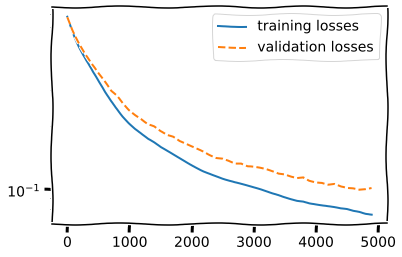

In [17]:
plt.plot(range(0, interval_eval * len(losses_train), interval_eval), losses_train, "-", label="training losses")
plt.plot(range(0, interval_eval * len(losses_valid), interval_eval), losses_valid, "--", label="validation losses")
plt.legend()
plt.yscale("log")
plt.show()

#### Evaluate the model

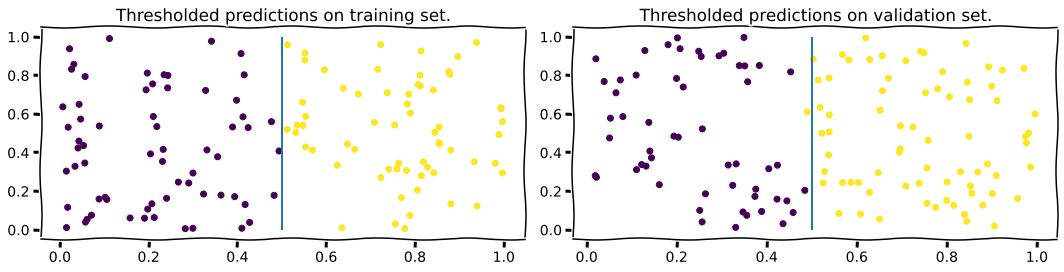

In [18]:
model.eval()

plt.subplot(1, 2, 1)
plt.title("Thresholded predictions on training set.")
y_hat = model(xs_train).detach().round()
plt.scatter(xs_train[:,0], xs_train[:,1], c=y_hat)
plt.vlines(.5, 0, 1)

plt.subplot(1, 2, 2)
plt.title("Thresholded predictions on validation set.")
y_hat = model(xs_valid).detach().round()
plt.scatter(xs_valid[:,0], xs_valid[:,1], c=y_hat)
plt.vlines(.5, 0, 1)

plt.gcf().set_size_inches(15, 4)
plt.tight_layout()
plt.show()

## Exercises
* In the training above, we did neither use early stopping nor the test set for evaluation. Implement these two omissions.
* What is a better choice for the final activation functions in the regression task?
```{toggle}
The $\tanh$ function. It makes the output smoother and restricts it into the $[-1, 1]$ interval.
```
* Train our simple MLP on the MNIST or FashionMNIST dataset. Follow the [PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for advice.